In [4]:
import json
import os
import json,ast
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt

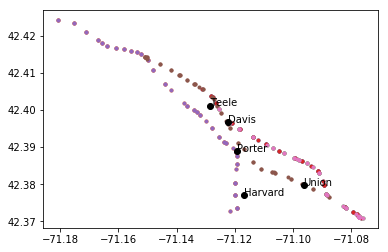

In [39]:
#fileList=os.listdir(targetDir)


#with open('busData/77/2018-11-05/140429.bus') as f:
 #   data = json.load(f)

def getAlltripsIDs(targetDir):
    allIds = set()
    fileList=os.listdir(targetDir)
    for curname in fileList:
        with open(targetDir + curname) as f:
            data = json.load(f)
        #print curname

        for i in range(0,len(data)):
            tripID = int(data['data'][i]['relationships']['trip']['data']['id'])
            allIds.add(tripID)
    return list(allIds)

def getMsgsFromId(targetDir,targetId):
    
    msgNum = 0
    
    df = pd.DataFrame()
    fileList=os.listdir(targetDir)
    for curname in fileList:
        with open(targetDir + curname) as f:
            data = json.load(f)
        #print curname

        for i in range(0,len(data)):
            tripID = int(data['data'][i]['relationships']['trip']['data']['id'])
            if tripID == targetId:
                
                #pprint(data['data'][i]['attributes'])
                
                temp = dict(data['data'][i]['attributes'])
                temp['id'] = tripID
                if msgNum == 0:
                    df=pd.DataFrame.from_dict(temp, orient='index')
                    df=df.transpose()
                else:
                    df_t=pd.DataFrame.from_dict(temp, orient='index')
                    df_t = df_t.transpose()
                    df = pd.concat([df, df_t])
                    #df = df.join(df_t,lsuffix='', rsuffix=str(msgNum))
                
                msgNum = msgNum + 1
                
    return df
# End def of functions
                
targetDir = 'busData/88/2018-11-06/'    
allIds=getAlltripsIDs(targetDir)
myTest = getMsgsFromId(targetDir,allIds[2])


targetDir = 'busData/77/2018-11-06/'    
allIds=getAlltripsIDs(targetDir)
myTest2 = getMsgsFromId(targetDir,allIds[1])

targetDir = 'busData/87/2018-11-06/'    
allIds=getAlltripsIDs(targetDir)
myTest3 = getMsgsFromId(targetDir,allIds[3])


targetDir = 'busData/88/2018-11-06/'    
allIds=getAlltripsIDs(targetDir)
myTest4 = getMsgsFromId(targetDir,allIds[4])



plt.plot(myTest['longitude'],myTest['latitude'],'.')
plt.plot(myTest2['longitude'],myTest2['latitude'],'.')
plt.plot(myTest3['longitude'],myTest3['latitude'],'.')
plt.plot(myTest4['longitude'],myTest4['latitude'],'.')
plt.plot(-71.1223,42.3967,'ko')
plt.text(-71.1223,42.3967,'Davis')

plt.plot(-71.1194,42.3889,'ko')
plt.text(-71.1194,42.3889,'Porter')

plt.plot(-71.1167,42.3770,'ko')
plt.text(-71.1167,42.3770,'Harvard')

plt.plot(-71.0964,42.3797,'ko')
plt.text(-71.0964,42.3797,'Union')


plt.plot(-71.1285,42.4011,'ko')
plt.text(-71.1285,42.4011,'Teele')



#plt.plot(myTest['current_stop_sequence'],'.')

plt.show()

#myTest['dir']



In [13]:
#myTest
